<a href="https://colab.research.google.com/github/hoatuyet423/fraud-prediction-accenture2b/blob/main/fraud_prediction_accenture2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This is the AI Studio Project hosted by Accenture under the program Break Through Tech AI at UCLA

Team members: Jenny Quach, Zahra Iranmanesh, Melody Yu, Veronica Salas, Sabahat Dawar

Challenge Advisors: Rachel Cabrera, Brendon T. Ngo


#Importing Data


In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
%pip install missingno

In [3]:
# data package
import pandas as pd
import numpy as np

# plotting
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

# pytorch
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# metrics
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay

# Read and Investigate Data

Done:
- Read data from local google colb files
- Investigate the dimension and some of the basic data using shape and head
- Check for the types of the data


In [4]:
url_train_identity = 'https://github.com/hoatuyet423/fraud-prediction-accenture2b/raw/main/train_identity.csv'
train_identity = pd.read_csv(url_train_identity)

#train_identity = pd.read_csv('/train_identity.csv')
train_identity.head(100)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2987390,0.0,60309.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,safari generic,24.0,1280x800,match_status:2,T,T,T,T,desktop,MacOS
96,2987398,0.0,228519.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 62.0 for android,NaN,NaN,NaN,F,F,T,T,mobile,LG-K500 Build/MMB29M
97,2987404,-5.0,78125.0,NaN,NaN,1.0,-1.0,NaN,NaN,NaN,...,mobile safari 10.0,32.0,2208x1242,match_status:1,T,F,F,T,mobile,iOS Device
98,2987405,-20.0,550210.0,NaN,NaN,0.0,-1.0,NaN,NaN,NaN,...,mobile safari 11.0,NaN,NaN,NaN,F,F,F,T,mobile,NaN


In [5]:
train_identity.shape

(144233, 41)

In [6]:
url_train_transaction = 'https://github.com/hoatuyet423/fraud-prediction-accenture2b/raw/main/train_transaction%20copy.csv'
train_transaction = pd.read_csv(url_train_transaction)

train_transaction.head(100)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2987095,0,88120,59.0,W,2538,476.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,2987096,0,88131,108.5,W,15121,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,2987097,0,88147,21.5,W,2581,199.0,150.0,mastercard,202.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,2987098,0,88149,159.0,W,6459,100.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
train_transaction.shape

(590540, 394)

In [8]:
train_identity.dtypes

TransactionID      int64
id_01            float64
id_02            float64
id_03            float64
id_04            float64
id_05            float64
id_06            float64
id_07            float64
id_08            float64
id_09            float64
id_10            float64
id_11            float64
id_12             object
id_13            float64
id_14            float64
id_15             object
id_16             object
id_17            float64
id_18            float64
id_19            float64
id_20            float64
id_21            float64
id_22            float64
id_23             object
id_24            float64
id_25            float64
id_26            float64
id_27             object
id_28             object
id_29             object
id_30             object
id_31             object
id_32            float64
id_33             object
id_34             object
id_35             object
id_36             object
id_37             object
id_38             object
DeviceType        object


In [9]:
train_transaction.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
V335              float64
V336              float64
V337              float64
V338              float64
V339              float64
Length: 394, dtype: object

In [10]:
train_identity.describe()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,1.442330e+05,144233.000000,140872.000000,66324.000000,66324.000000,136865.000000,136865.000000,5155.000000,5155.000000,74926.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.236329e+06,-10.170502,174716.584708,0.060189,-0.058938,1.615585,-6.698710,13.285354,-38.600388,0.091023,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.788496e+05,14.347949,159651.816856,0.598231,0.701015,5.249856,16.491104,11.384207,26.084899,0.983842,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987004e+06,-100.000000,1.000000,-13.000000,-28.000000,-72.000000,-100.000000,-46.000000,-100.000000,-36.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.077142e+06,-10.000000,67992.000000,0.000000,0.000000,0.000000,-6.000000,5.000000,-48.000000,0.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.198818e+06,-5.000000,125800.500000,0.000000,0.000000,0.000000,0.000000,14.000000,-34.000000,0.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.392923e+06,-5.000000,228749.000000,0.000000,0.000000,1.000000,0.000000,22.000000,-23.000000,0.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577534e+06,0.000000,999595.000000,10.000000,0.000000,52.000000,0.000000,61.000000,0.000000,25.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


In [11]:
train_transaction.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


In [12]:
# combine train_transaction and train_identity by TransactionID
train_df = train_transaction.merge(train_identity, on = 'TransactionID', how='outer')
train_df.shape

(590540, 434)

In [13]:
train_df.head(100)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2987095,0,88120,59.0,W,2538,476.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,2987096,0,88131,108.5,W,15121,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,2987097,0,88147,21.5,W,2581,199.0,150.0,mastercard,202.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,2987098,0,88149,159.0,W,6459,100.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
train_df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


PyTorch

Use Pytorch to run the data in batch instead of everything at once


In [15]:
# training_data = datasets.FashionMNIST(
#     root="data",
#     train=True,
#     download=True,
#     transform=ToTensor()
# )

Observation: If transaction amount is too big or too little (min for transaction is 99 cents) then it might be a potential fraud

Plan: ?

In [16]:
fraudData = train_df.loc[train_df['isFraud']==1]
fraudData


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
203,2987203,1,89760,445.000,W,18268,583.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,2987240,1,90193,37.098,C,13413,103.0,185.0,visa,137.0,...,chrome 54.0 for android,NaN,NaN,NaN,F,F,T,T,mobile,Redmi Note 4 Build/MMB29M
243,2987243,1,90246,37.098,C,13413,103.0,185.0,visa,137.0,...,chrome 54.0 for android,NaN,NaN,NaN,F,F,T,T,mobile,Redmi Note 4 Build/MMB29M
245,2987245,1,90295,37.098,C,13413,103.0,185.0,visa,137.0,...,chrome 54.0 for android,NaN,NaN,NaN,F,F,T,T,mobile,Redmi Note 4 Build/MMB29M
288,2987288,1,90986,155.521,C,16578,545.0,185.0,visa,226.0,...,chrome 62.0 for ios,NaN,NaN,NaN,F,F,F,F,mobile,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590361,3577361,1,15807368,1224.000,W,3278,453.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590364,3577364,1,15807516,69.964,C,5812,408.0,185.0,mastercard,224.0,...,samsung browser 6.4,NaN,NaN,NaN,F,F,T,F,mobile,SAMSUNG SM-J700M Build/MMB29K
590368,3577368,1,15807677,100.000,H,6758,399.0,150.0,american express,146.0,...,mobile safari 11.0,32.0,2208x1242,match_status:1,T,F,F,T,mobile,iOS Device
590372,3577372,1,15807758,117.000,W,14037,111.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


By observation, we saw that over almost 600k data, there is around 20k of them is fraud, bring the proportion of around 3% of fraud data and 97% of non-fraud data. Since the data is too large to run on google colab

In [17]:
non_fraud_data = train_df.loc[train_df['isFraud']==0]
non_fraud_data

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
fraud_sample = fraudData.sample(n = 30)
fraud_sample

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
382326,3369326,1,9576418,54.500,W,9175,111.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238954,3225954,1,5630201,17.401,C,10086,500.0,185.0,mastercard,224.0,...,chrome 64.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G955U Build/NRD90M
588072,3575072,1,15731692,12.419,C,16346,324.0,185.0,visa,226.0,...,chrome 66.0,NaN,NaN,NaN,F,F,T,F,desktop,Windows
367829,3354829,1,9144313,186.000,W,11207,361.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212412,3199412,1,4923987,57.600,C,5812,408.0,185.0,mastercard,224.0,...,firefox,NaN,NaN,NaN,F,F,T,F,desktop,NaN
38805,3025805,1,948445,4.431,C,10876,104.0,185.0,visa,137.0,...,mobile safari 11.0,NaN,NaN,NaN,F,F,F,T,mobile,NaN
489481,3476481,1,12765747,45.000,S,17551,481.0,150.0,visa,226.0,...,firefox 59.0,24.0,1600x900,match_status:0,T,F,T,T,desktop,Windows
189355,3176355,1,4228587,200.000,R,3636,399.0,150.0,american express,146.0,...,mobile safari 11.0,32.0,2436x1125,match_status:1,T,F,F,F,mobile,iOS Device
320556,3307556,1,7960384,13.836,C,16136,204.0,185.0,visa,138.0,...,chrome 64.0,NaN,NaN,NaN,F,F,T,F,desktop,Windows
20549,3007549,1,525110,19.500,W,6156,225.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
non_fraud_sample = non_fraud_data.sample(n=970)
non_fraud_sample

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
459158,3446158,0,11762431,62.464,C,17356,555.0,119.0,visa,226.0,...,chrome 65.0,NaN,NaN,NaN,F,F,T,F,desktop,NaN
377803,3364803,0,9461912,49.000,W,11207,361.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313107,3300107,0,7785114,49.000,W,13497,222.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
474512,3461512,0,12260338,97.000,W,18343,374.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165491,3152491,0,3528635,82.000,W,2722,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555493,3542493,0,14678891,125.000,R,15066,170.0,150.0,mastercard,102.0,...,chrome 66.0,24.0,1366x768,match_status:2,T,F,T,F,desktop,Windows
545675,3532675,0,14406178,57.950,W,11106,100.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363267,3350267,0,9022151,75.000,W,7664,490.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
448732,3435732,0,11444989,97.000,W,1214,174.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
sample_train_df = non_fraud_sample.append(fraud_sample, ignore_index=True)
sample_train_df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3446158,0,11762431,62.464,C,17356,555.0,119.0,visa,226.0,...,chrome 65.0,NaN,NaN,NaN,F,F,T,F,desktop,NaN
1,3364803,0,9461912,49.000,W,11207,361.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3300107,0,7785114,49.000,W,13497,222.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3461512,0,12260338,97.000,W,18343,374.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3152491,0,3528635,82.000,W,2722,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3214180,1,5362897,77.338,C,10175,176.0,185.0,visa,226.0,...,chrome 63.0,NaN,NaN,NaN,F,F,T,F,desktop,Windows
996,3127827,1,2903645,34.000,W,17055,393.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,3512152,1,13806874,59.000,W,6457,321.0,150.0,visa,195.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,3424301,1,11055532,934.000,W,6019,583.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we can randomly shuffle the dataframe to make sure our train data is not biased with any pattern

In [21]:
from sklearn.utils import shuffle
sample_train_df = shuffle(sample_train_df).reset_index()
sample_train_df

,index,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,736,3563289,0,15308114,67.950,W,17933,512.0,150.0,visa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,857,3153616,0,3548696,29.000,W,15863,158.0,150.0,visa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,846,3337996,0,8645281,30.950,W,8528,215.0,150.0,visa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,85,3495972,0,13326421,336.950,W,14785,555.0,150.0,visa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,982,3419494,1,10941562,72.792,C,1164,545.0,185.0,visa,...,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Hisense U963 Build/MRA58K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,278,3451041,0,11928177,108.950,W,15066,170.0,150.0,mastercard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,202,3337665,0,8640038,117.000,W,2803,100.0,150.0,visa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,944,3430821,0,11292300,77.000,W,14858,558.0,150.0,visa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,364,3037741,0,1198212,34.000,W,18132,567.0,150.0,mastercard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
sample_train_df.isnull().sum()

index               0
TransactionID       0
isFraud             0
TransactionDT       0
TransactionAmt      0
                 ... 
id_36             752
id_37             752
id_38             752
DeviceType        753
DeviceInfo        787
Length: 435, dtype: int64

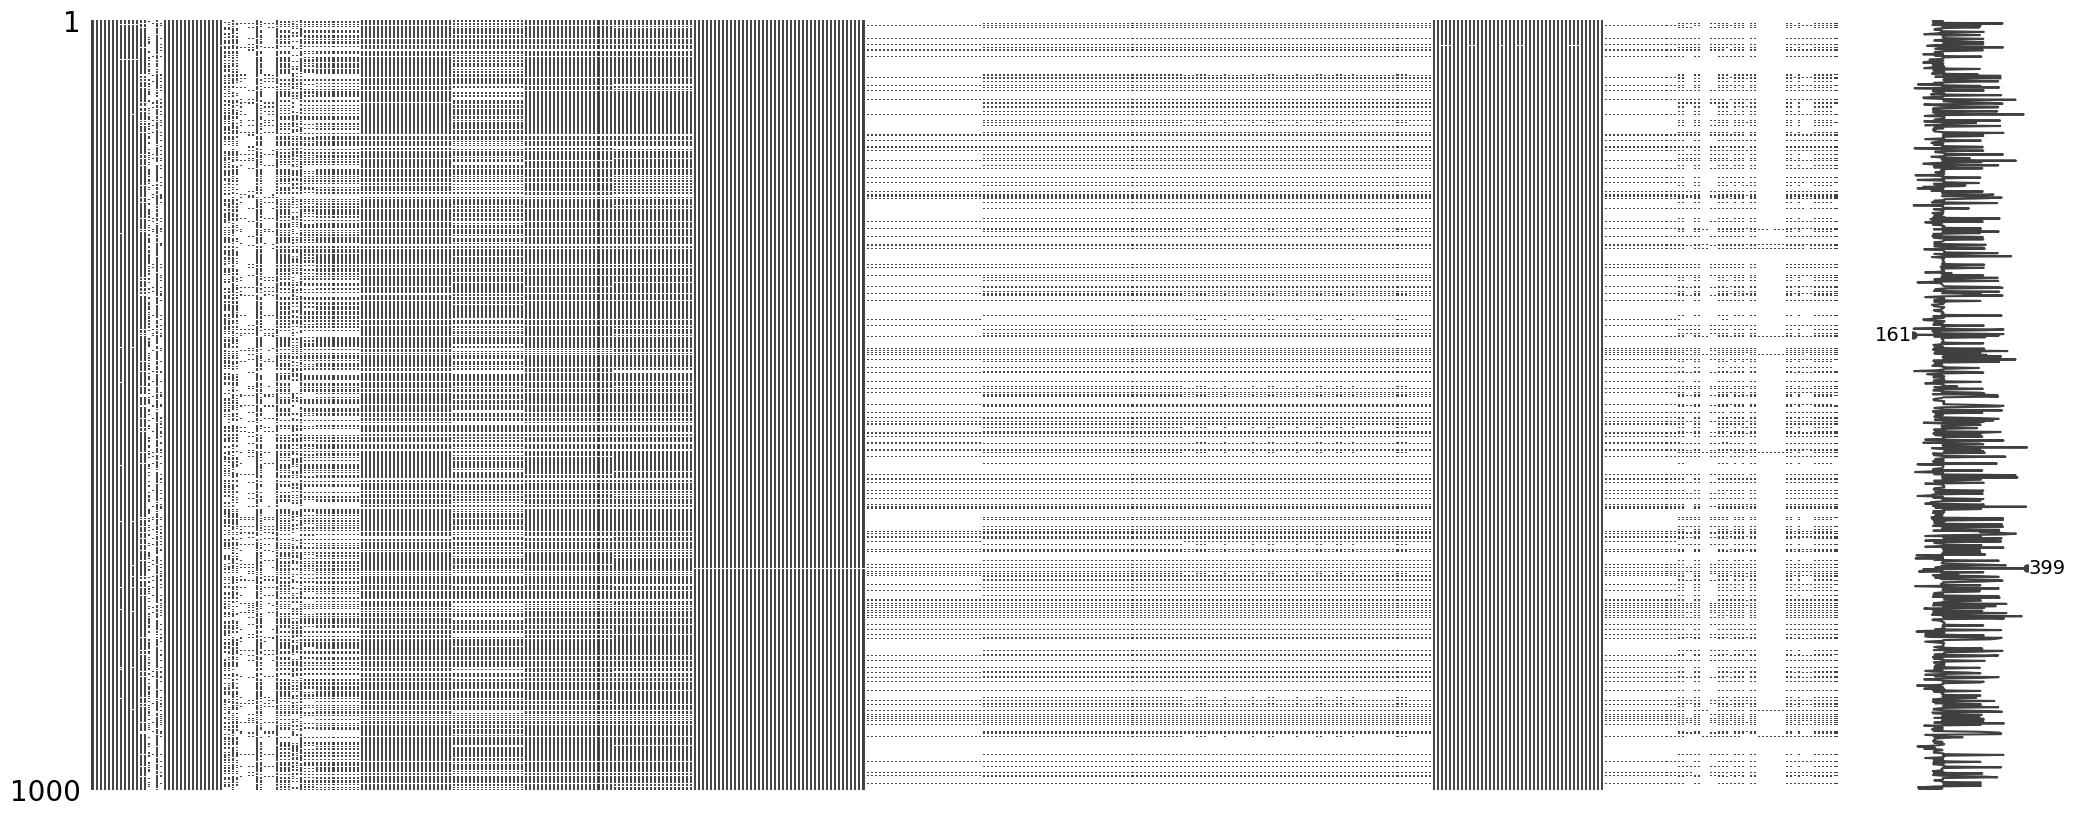

In [23]:
msno.matrix(sample_train_df);

# Features with vague names


In [24]:
id_colnames = [x for x in sample_train_df if "id" in x ]
for x in id_colnames:
    sample_train_df.drop(x, inplace=True, axis=1)
sample_train_df.shape

(1000, 397)

In [25]:
# V_colnames = [x for x in train_df if "V" in x ]
# for x in V_colnames:
#     train_df.drop(x, inplace=True, axis=1)
# train_df.shape

In [26]:
#train_df.head(100)

# Missing Data

Observation: We observe that there is a lot of missing values in train_identity and train_transaction so we think that we should drop the columns with too much missing data as those might not be relevant or useful to us.

Plan: We are planning to have a for loop to loop through the number if missing data in each columns and drop the columns that have more than 130k missing data for the train_transaction and more than 50k for the train_identity


In [27]:
threshold = len(sample_train_df)/80
nan_count = np.sum(sample_train_df.isnull(), axis = 0)
to_impute_cols = sample_train_df.columns[nan_count > threshold]
for x in to_impute_cols:
    sample_train_df.drop(x, inplace=True, axis=1)
sample_train_df.shape


(1000, 111)

In [28]:
sample_train_df.isnull().sum()

index             0
TransactionID     0
isFraud           0
TransactionDT     0
TransactionAmt    0
                 ..
V317              0
V318              0
V319              0
V320              0
V321              0
Length: 111, dtype: int64

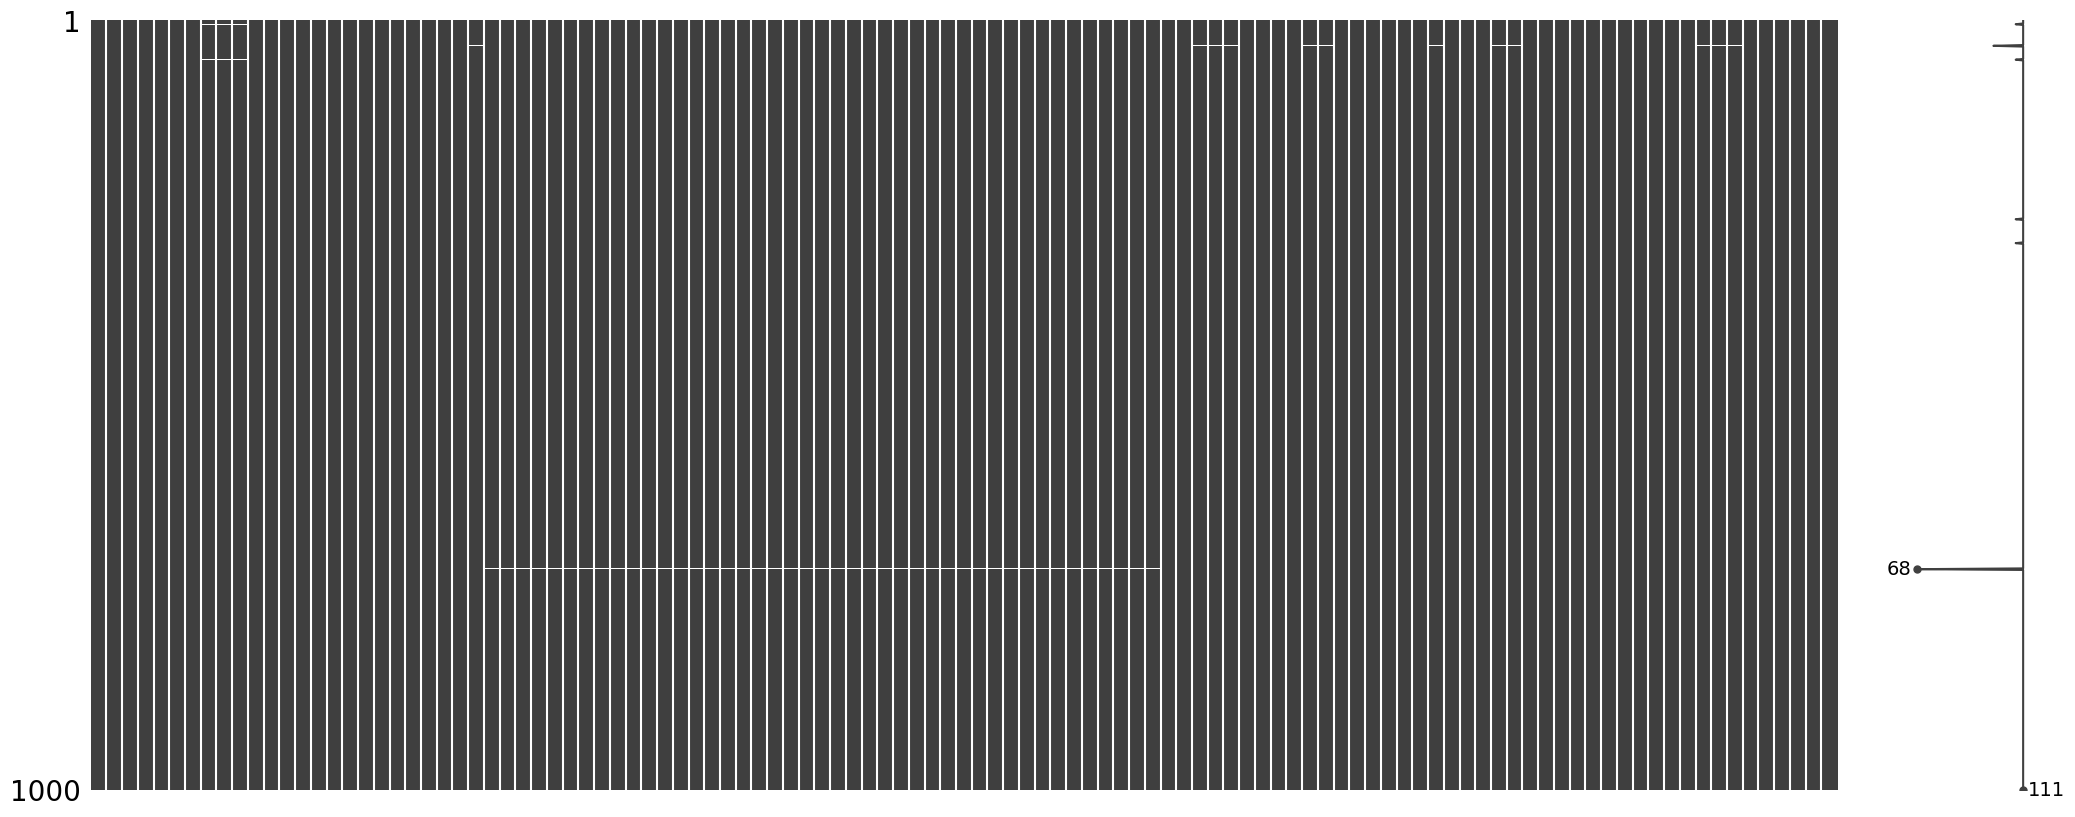

In [29]:
msno.matrix(sample_train_df);


As we removed all the columns with more than 90% missing values, we will now resolved the rest of the columns with missing values by replacing them with mean values


In [30]:
nan_detected = np.sum(sample_train_df.isnull(), axis = 0) != 0
is_int_or_float = (sample_train_df.dtypes == 'int64') | (sample_train_df.dtypes == 'float64')
mean_replaced_cols = sample_train_df.columns[nan_detected & is_int_or_float]

# for colname in mean_replaced_cols:
#     train_df[colname+"_na"] = train_df[colname].isnull()

for colname in mean_replaced_cols:
    sample_train_df[colname].fillna(value=train_df[colname].mean(), inplace=True)

sample_train_df

,index,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card3,card4,card6,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,736,3563289,0,15308114,67.950,W,17933,150.0,visa,debit,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,857,3153616,0,3548696,29.000,W,15863,150.0,visa,debit,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,846,3337996,0,8645281,30.950,W,8528,150.0,visa,debit,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,85,3495972,0,13326421,336.950,W,14785,150.0,visa,debit,...,0.000000,0.000000,0.000000,0.000000,0.0,336.950012,0.0,0.0,0.0,0.0
4,982,3419494,1,10941562,72.792,C,1164,185.0,visa,debit,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,278,3451041,0,11928177,108.950,W,15066,150.0,mastercard,credit,...,0.000000,36.950001,95.900002,36.950001,0.0,0.000000,0.0,0.0,0.0,0.0
996,202,3337665,0,8640038,117.000,W,2803,150.0,visa,debit,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
997,944,3430821,0,11292300,77.000,W,14858,150.0,visa,debit,...,237.899994,57.950001,237.899994,237.899994,77.0,77.000000,77.0,0.0,0.0,0.0
998,364,3037741,0,1198212,34.000,W,18132,150.0,mastercard,debit,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


So as we replaced all the missing values in the numerical columns with their mean values, we can now work toward the missing values in non-numerical columns and can use one hot encoding to transfer them into numerical values. We will first figure out which columns that need to use one hot encoding


In [31]:
is_int_or_float_or_bool = (sample_train_df.dtypes == 'int64') | (sample_train_df.dtypes == 'float64') | (sample_train_df.dtypes == bool)
sample_train_df.columns[is_int_or_float_or_bool == False]

Index(['ProductCD', 'card4', 'card6'], dtype='object')

Now we know that there is 3 columns that can be transfer into one-hot-encoding that is ProductCD, card4, and card6


In [32]:
columns_to_encode = ['ProductCD', 'card4', 'card6']
for col in columns_to_encode:
  one_hot_encoded = pd.get_dummies(sample_train_df[col], prefix = col)
  sample_train_df = pd.concat([sample_train_df, one_hot_encoded], axis = 1)
  sample_train_df.drop(col, axis = 1, inplace=True)

In [33]:
sample_train_df

,index,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card3,C1,C2,C3,...,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_credit,card6_debit
0,736,3563289,0,15308114,67.950,17933,150.0,1.0,1.0,0.0,...,0,0,0,1,0,0,0,1,0,1
1,857,3153616,0,3548696,29.000,15863,150.0,1.0,1.0,0.0,...,0,0,0,1,0,0,0,1,0,1
2,846,3337996,0,8645281,30.950,8528,150.0,1.0,1.0,0.0,...,0,0,0,1,0,0,0,1,0,1
3,85,3495972,0,13326421,336.950,14785,150.0,2.0,3.0,0.0,...,0,0,0,1,0,0,0,1,0,1
4,982,3419494,1,10941562,72.792,1164,185.0,226.0,233.0,0.0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,278,3451041,0,11928177,108.950,15066,150.0,3.0,1.0,0.0,...,0,0,0,1,0,0,1,0,1,0
996,202,3337665,0,8640038,117.000,2803,150.0,2.0,1.0,0.0,...,0,0,0,1,0,0,0,1,0,1
997,944,3430821,0,11292300,77.000,14858,150.0,138.0,122.0,0.0,...,0,0,0,1,0,0,0,1,0,1
998,364,3037741,0,1198212,34.000,18132,150.0,1.0,1.0,0.0,...,0,0,0,1,0,0,1,0,0,1


In [34]:
sample_train_df.drop('index', inplace=True, axis=1)
sample_train_df

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card3,C1,C2,C3,C4,...,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_credit,card6_debit
0,3563289,0,15308114,67.950,17933,150.0,1.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,1
1,3153616,0,3548696,29.000,15863,150.0,1.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,1
2,3337996,0,8645281,30.950,8528,150.0,1.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,1
3,3495972,0,13326421,336.950,14785,150.0,2.0,3.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,1
4,3419494,1,10941562,72.792,1164,185.0,226.0,233.0,0.0,58.0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3451041,0,11928177,108.950,15066,150.0,3.0,1.0,0.0,0.0,...,0,0,0,1,0,0,1,0,1,0
996,3337665,0,8640038,117.000,2803,150.0,2.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,1
997,3430821,0,11292300,77.000,14858,150.0,138.0,122.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,1
998,3037741,0,1198212,34.000,18132,150.0,1.0,1.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,1


We will identify the numeric columns and normalize them by using SkLearn's MinMaxScaler

In [35]:
# Identifying and normalizing features
from sklearn.preprocessing import MinMaxScaler

# Identify columns of type int64, float64, or bool
is_int_or_float_or_bool = (sample_train_df.dtypes == 'int64') | (sample_train_df.dtypes == 'float64') | (sample_train_df.dtypes == bool)

# Get the columns that are not of type int64, float64, or bool
non_numeric_cols = sample_train_df.columns[is_int_or_float_or_bool == False]

# Get the columns that are of type int64, float64, or bool
numeric_cols = sample_train_df.columns[is_int_or_float_or_bool]

# Create a Min-Max scaler
scaler = MinMaxScaler()

# Normalize the numeric columns
sample_train_df[numeric_cols] = scaler.fit_transform(sample_train_df[numeric_cols])

In [36]:
sample_train_df

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card3,C1,C2,C3,C4,...,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_credit,card6_debit
0,0.976983,0.0,0.968879,0.029835,0.975911,0.530120,0.000000,0.0005,0.0,0.000000,...,0,0,0,1,0,0,0,1,0,1
1,0.282122,0.0,0.220158,0.011781,0.856334,0.530120,0.000000,0.0005,0.0,0.000000,...,0,0,0,1,0,0,0,1,0,1
2,0.594856,0.0,0.544657,0.012685,0.432615,0.530120,0.000000,0.0005,0.0,0.000000,...,0,0,0,1,0,0,0,1,0,1
3,0.862805,0.0,0.842705,0.154521,0.794062,0.530120,0.000664,0.0015,0.0,0.000000,...,0,0,0,1,0,0,0,1,0,1
4,0.733087,1.0,0.690861,0.032080,0.007221,0.951807,0.149303,0.1165,0.0,0.059487,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.786595,0.0,0.753679,0.048839,0.810294,0.530120,0.001327,0.0005,0.0,0.000000,...,0,0,0,1,0,0,1,0,1,0
996,0.594294,0.0,0.544323,0.052571,0.101901,0.530120,0.000664,0.0005,0.0,0.000000,...,0,0,0,1,0,0,0,1,0,1
997,0.752300,0.0,0.713193,0.034030,0.798279,0.530120,0.090909,0.0610,0.0,0.000000,...,0,0,0,1,0,0,0,1,0,1
998,0.085582,0.0,0.070503,0.014099,0.987407,0.530120,0.000000,0.0005,0.0,0.000000,...,0,0,0,1,0,0,1,0,0,1


# EDA


In [37]:
sample_train_df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card3,C1,C2,C3,C4,...,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_credit,card6_debit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.494804,0.030000,0.458640,0.058144,0.521119,0.562082,0.006451,0.005710,0.003000,0.002962,...,0.069000,0.072000,0.02000,0.741000,0.014000,0.01200,0.31700,0.653000,0.244000,0.752000
std,0.288559,0.170673,0.291618,0.096508,0.279165,0.122419,0.050518,0.046644,0.044643,0.047182,...,0.253581,0.258617,0.14007,0.438305,0.117549,0.10894,0.46554,0.476254,0.429708,0.432068
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
25%,0.258412,0.000000,0.195933,0.016794,0.298149,0.530120,0.000000,0.000500,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,1.000000
50%,0.507665,0.000000,0.465936,0.027637,0.519958,0.530120,0.000000,0.000500,0.000000,0.000000,...,0.000000,0.000000,0.00000,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,1.000000
75%,0.744532,0.000000,0.702827,0.052571,0.765727,0.530120,0.001327,0.001500,0.000000,0.000000,...,0.000000,0.000000,0.00000,1.000000,0.000000,0.00000,1.00000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000


In [38]:
sample_train_df.groupby(['isFraud']).describe()

TransactionID                                                    \
                count      mean       std       min       25%       50%   
isFraud                                                                   
0.0             970.0  0.496071  0.288552  0.000000  0.258684  0.512959   
1.0              30.0  0.453846  0.290675  0.019305  0.259732  0.404781   

                            TransactionDT            ... card6_credit       \
              75%       max         count      mean  ...          75%  max   
isFraud                                              ...                     
0.0      0.745737  0.999233         970.0  0.460000  ...          0.0  1.0   
1.0      0.641848  1.000000          30.0  0.414693  ...          1.0  1.0   

        card6_debit                                               
              count      mean       std  min  25%  50%  75%  max  
isFraud                                                           
0.0           970.0  0.756701  0.429295  0.0  1.0  1.0  1.0  1.0  
1.0            30.0  0.600000  0.498273  0.0  0.0  1.0  1.0  1.0  

[2 rows x 936 columns]

<Axes: xlabel='isFraud', ylabel='TransactionAmt'>

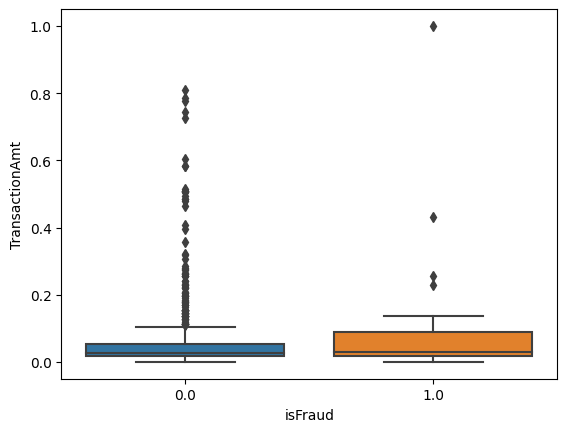

In [39]:
sns.boxplot(data=sample_train_df,x='isFraud',y='TransactionAmt')

<Axes: xlabel='isFraud', ylabel='TransactionDT'>

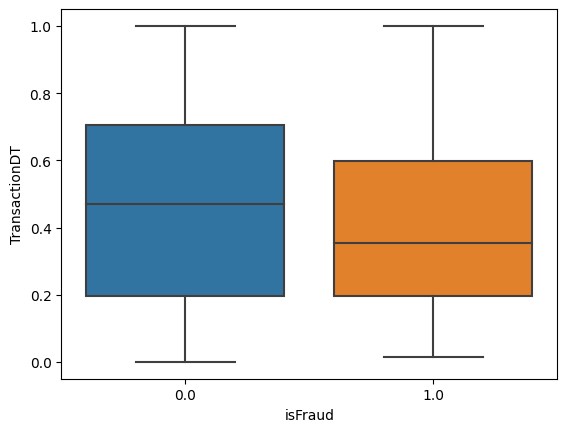

In [40]:
sns.boxplot(data=sample_train_df,x='isFraud',y='TransactionDT')

# Split Labels and Features

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
y = sample_train_df["isFraud"]
X = sample_train_df.drop(columns="isFraud")

In [43]:
X

,TransactionID,TransactionDT,TransactionAmt,card1,card3,C1,C2,C3,C4,C5,...,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_credit,card6_debit
0,0.976983,0.968879,0.029835,0.975911,0.530120,0.000000,0.0005,0.0,0.000000,0.00431,...,0,0,0,1,0,0,0,1,0,1
1,0.282122,0.220158,0.011781,0.856334,0.530120,0.000000,0.0005,0.0,0.000000,0.00000,...,0,0,0,1,0,0,0,1,0,1
2,0.594856,0.544657,0.012685,0.432615,0.530120,0.000000,0.0005,0.0,0.000000,0.00431,...,0,0,0,1,0,0,0,1,0,1
3,0.862805,0.842705,0.154521,0.794062,0.530120,0.000664,0.0015,0.0,0.000000,0.00431,...,0,0,0,1,0,0,0,1,0,1
4,0.733087,0.690861,0.032080,0.007221,0.951807,0.149303,0.1165,0.0,0.059487,0.00000,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.786595,0.753679,0.048839,0.810294,0.530120,0.001327,0.0005,0.0,0.000000,0.00431,...,0,0,0,1,0,0,1,0,1,0
996,0.594294,0.544323,0.052571,0.101901,0.530120,0.000664,0.0005,0.0,0.000000,0.00000,...,0,0,0,1,0,0,0,1,0,1
997,0.752300,0.713193,0.034030,0.798279,0.530120,0.090909,0.0610,0.0,0.000000,1.00000,...,0,0,0,1,0,0,0,1,0,1
998,0.085582,0.070503,0.014099,0.987407,0.530120,0.000000,0.0005,0.0,0.000000,0.00000,...,0,0,0,1,0,0,1,0,0,1


In [44]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
995    0.0
996    0.0
997    0.0
998    0.0
999    0.0
Name: isFraud, Length: 1000, dtype: float64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

# Gradient Boosted Decision Trees (GBDT) model
Check if GBDT performs well with the batch of data, sample_data

In [46]:
from sklearn.ensemble import GradientBoostingClassifier  # Change this to Regressor if you have a regression problem


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gbdt_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbdt_model.fit(X_train, y_train)
y_pred = gbdt_model.predict(X_test)

Evaluate the model

In [47]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

Print the results

In [48]:
print(f"Accuracy: {accuracy:.2f}")

print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(class_report)

Accuracy: 0.95
Confusion Matrix:
[[315   2]
 [ 13   0]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       317
         1.0       0.00      0.00      0.00        13

    accuracy                           0.95       330
   macro avg       0.48      0.50      0.49       330
weighted avg       0.92      0.95      0.94       330



              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       317
         1.0       0.00      0.00      0.00        13

    accuracy                           0.95       330
   macro avg       0.48      0.50      0.49       330
weighted avg       0.92      0.95      0.94       330



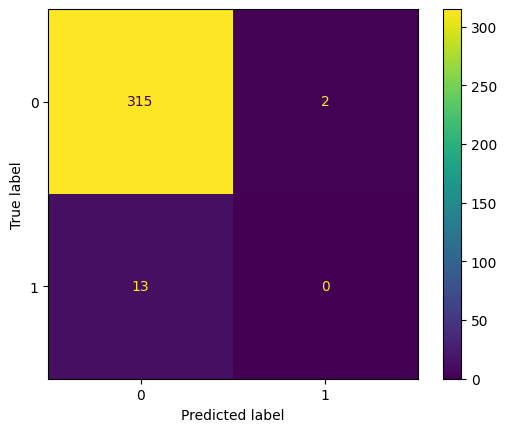

In [49]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot();

Analysis of the GBDT model Results:








 The model does a good job when it comes to class 0.0 (Not fraud). It is very accurate, rarely makes mistakes, and is good at finding instances of this type. However, when it comes to the other type, class 1.0 (Fraud), the model struggles significantly. It often makes mistakes, and it's not very good at recognizing instances of this type.

The reasons for this could be either that there is class imbalance between the fraud (1.0) and not fraud (0.0) classes, making it harder for the model to learn.

# Logistic Regression Model

In [50]:
import os
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

In [51]:
def train_test_LR(X_train, y_train, X_test, y_test, c=316):
    '''
    Fit a Linear Regression classifier to the training data X_train, y_train.
    Return the loss and accuracy of resulting predictions on the test set.
    Parameters:
        C = Factor that controls how much regularization is applied to the model.
    '''
    model = LogisticRegression(C=c)

    model.fit(X_train, y_train)

    probability_predictions = model.predict_proba(X_test)

    l_loss = log_loss(y_test, probability_predictions)

    class_label_predictions = model.predict(X_test)

    acc_score = accuracy_score(y_test, class_label_predictions)

    print(classification_report(y_test, class_label_predictions))

    cm = confusion_matrix(y_test, class_label_predictions)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot();



    return l_loss, acc_score

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       317
         1.0       0.00      0.00      0.00        13

    accuracy                           0.95       330
   macro avg       0.48      0.49      0.49       330
weighted avg       0.92      0.95      0.93       330

Log loss: 0.3682512291841538
Accuracy: 0.9454545454545454


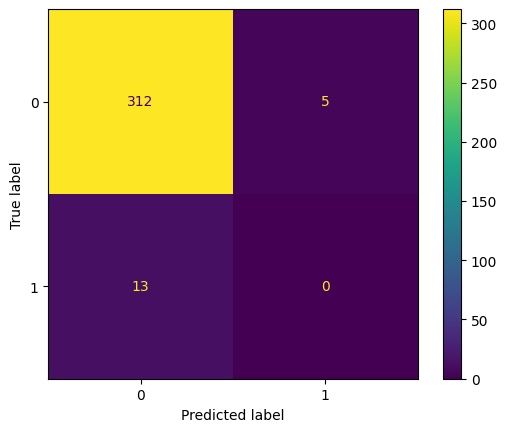

In [52]:
loss, acc = train_test_LR(X_train, y_train, X_test, y_test)
print('Log loss: ' + str(loss))
print('Accuracy: ' + str(acc))

In [53]:
cs = [10**i for i in range(-10,10)]
cs

[1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 1,
 10,
 100,
 1000,
 10000,
 100000,
 1000000,
 10000000,
 100000000,
 1000000000]

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       317
         1.0       0.00      0.00      0.00        13

    accuracy                           0.96       330
   macro avg       0.48      0.50      0.49       330
weighted avg       0.92      0.96      0.94       330

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       317
         1.0       0.00      0.00      0.00        13

    accuracy                           0.96       330
   macro avg       0.48      0.50      0.49       330
weighted avg       0.92      0.96      0.94       330

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       317
         1.0       0.00      0.00      0.00        13

    accuracy                           0.96       330
   macro avg       0.48      0.50      0.49       330
weighted avg       0.92      0.96      0.94       330

              preci

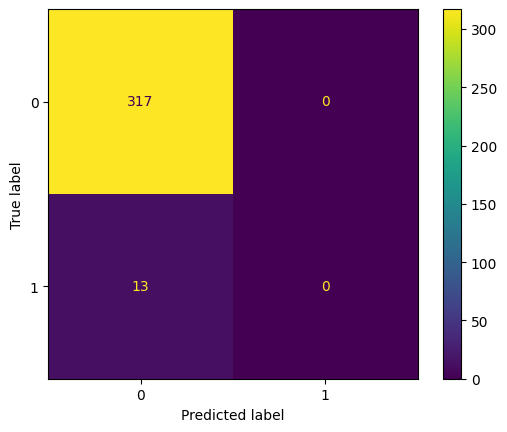

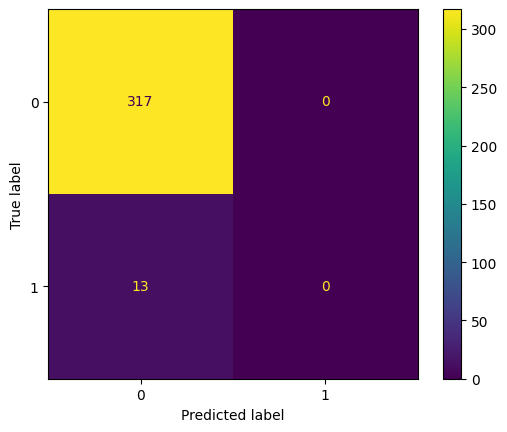

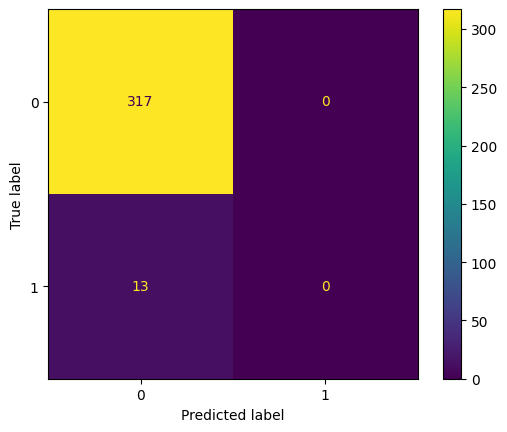

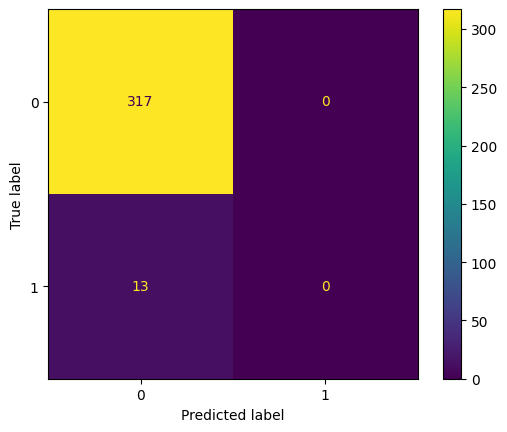

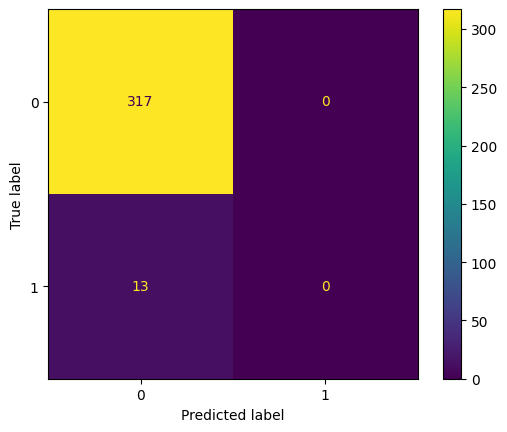

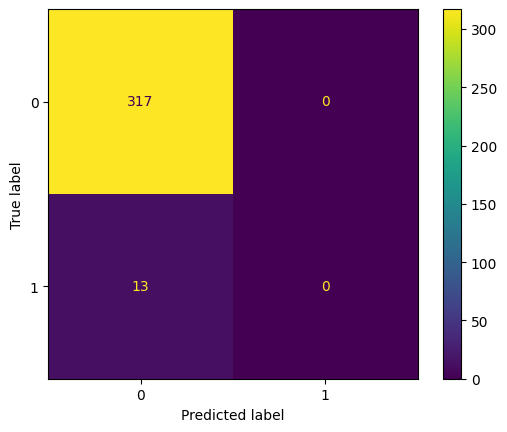

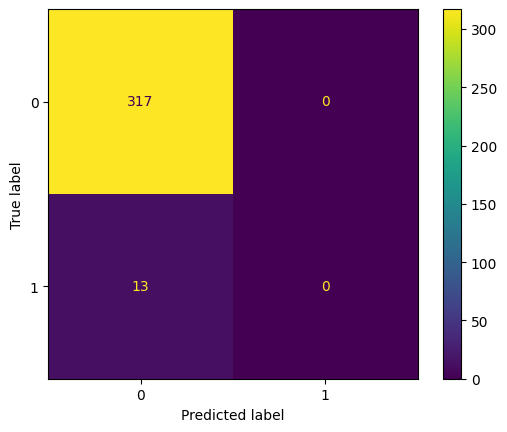

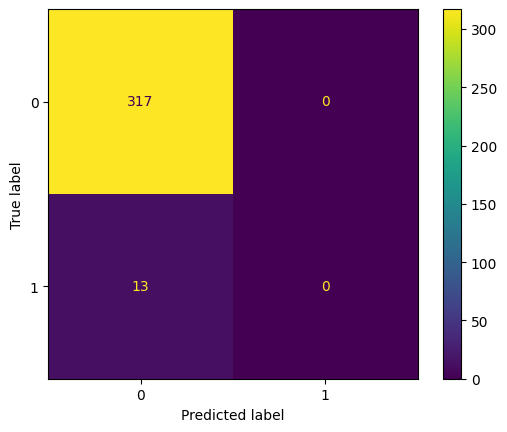

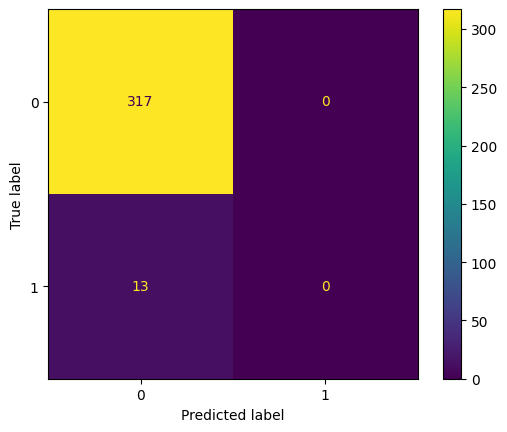

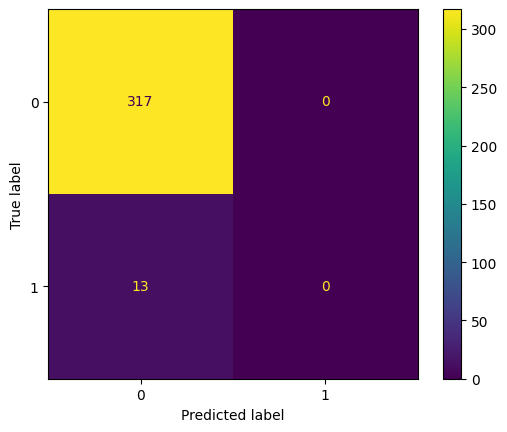

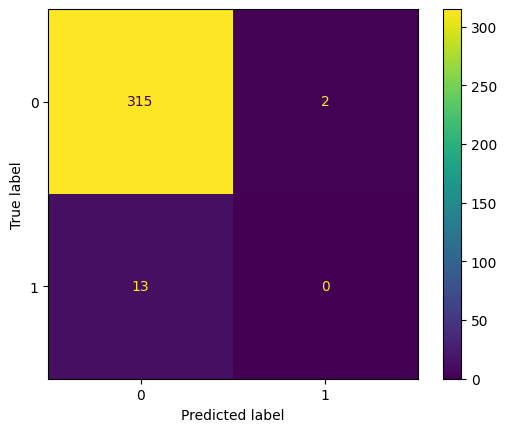

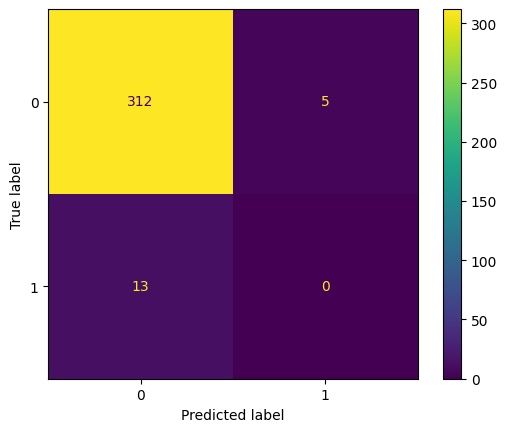

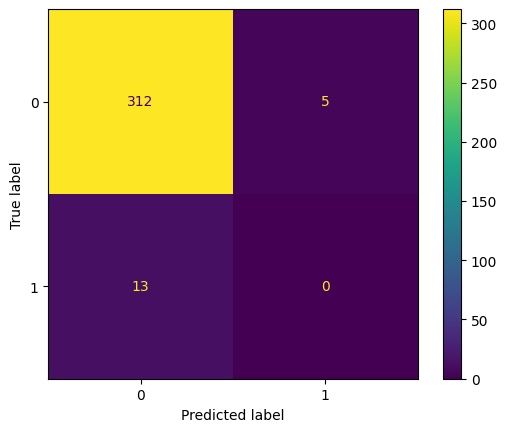

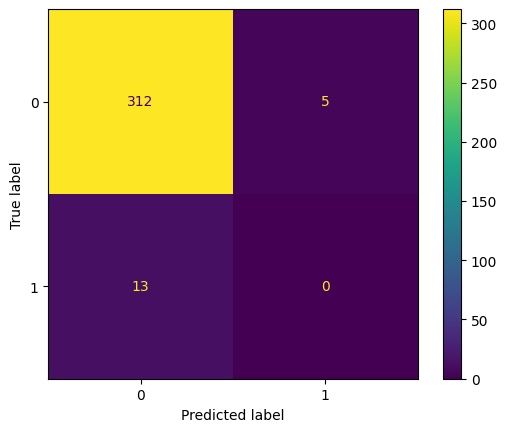

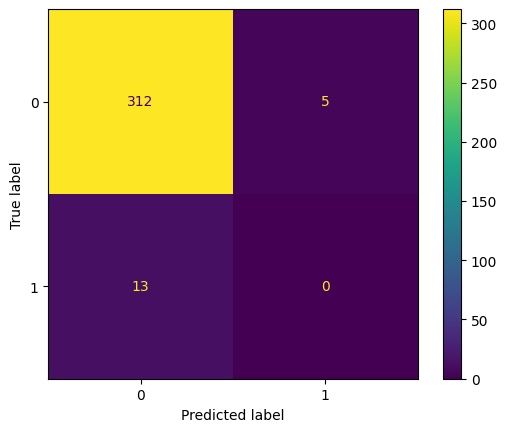

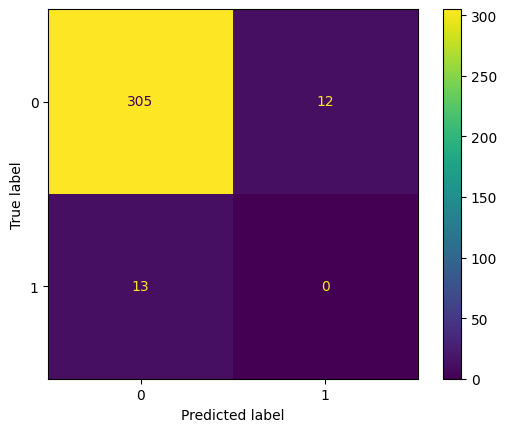

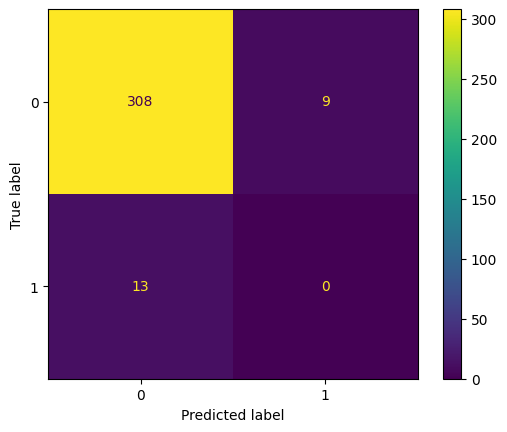

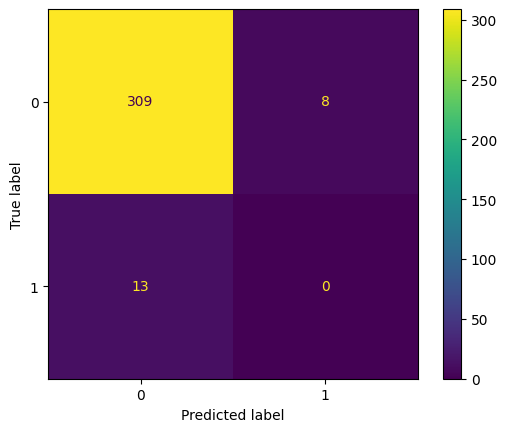

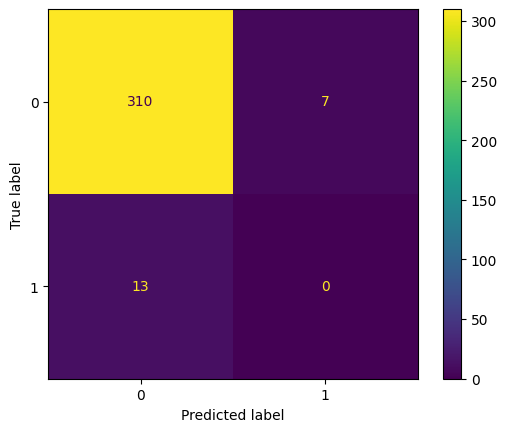

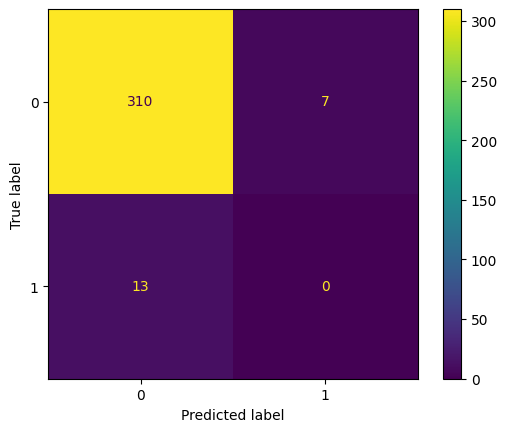

In [54]:
ll_cs = []
acc_cs = []
for c in cs:
    # Call train_test_LR() function with training and test data and current value of C
    ll, acc = train_test_LR(X_train, y_train, X_test, y_test, c)

    # Append log loss and accuracy score to respective lists
    ll_cs.append(ll)
    acc_cs.append(acc)

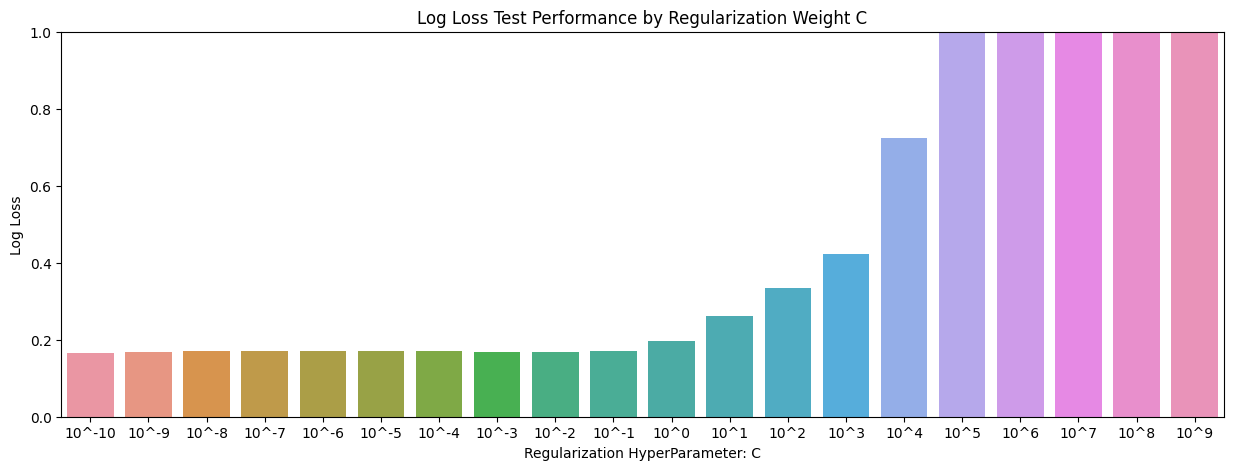

In [55]:
plt.figure(figsize=(15,5))

ax = sns.barplot(x=cs, y=ll_cs)
g = ax.set_xticklabels([f'10^{i}' for i in range(-10,10)])
ax.set_xlabel('Regularization HyperParameter: C')
ax.set_ylabel('Log Loss')
ax.set_ylim([0, 1])
g = plt.title('Log Loss Test Performance by Regularization Weight C')

We can tell when C = 10, the log loss is the smallest.

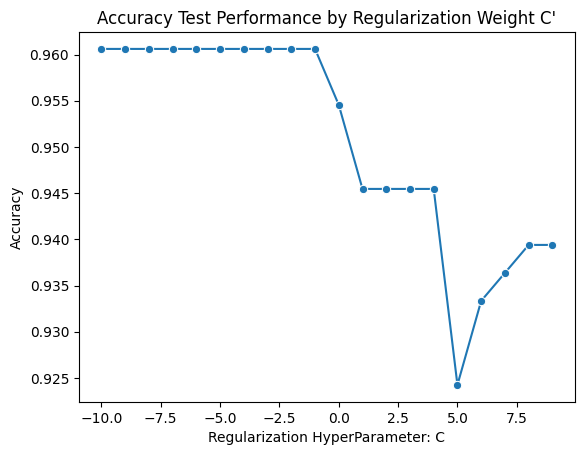

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.log10(cs)

sns.lineplot(x=x, y=acc_cs, marker='o')

plt.title("Accuracy Test Performance by Regularization Weight C'")
plt.xlabel("Regularization HyperParameter: C")
plt.ylabel("Accuracy")
plt.show()

In [57]:
# print(classification_report(y_test, y_pred))

# cm = confusion_matrix(y_test, df_predicted_test_Y)
# disp = ConfusionMatrixDisplay(cm)
# disp.plot();

When the exponent of C is around 2.5, the accuracy can reach the max value.

# Naive Bayes Classifier
[insert notes here]

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [59]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
acc = accuracy_score(y_pred, y_test)

In [60]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Gaussian Naive Bayes model accuracy(in %):", acc*100)

Gaussian Naive Bayes model accuracy(in %): 92.72727272727272


              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96       317
         1.0       0.13      0.15      0.14        13

    accuracy                           0.93       330
   macro avg       0.55      0.56      0.55       330
weighted avg       0.93      0.93      0.93       330



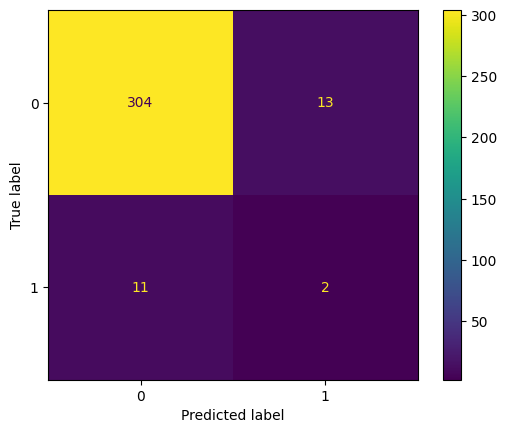

In [61]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot();

# XG Boosted Model


In [62]:
!pip install scikit-optimize

In [63]:
from sklearn.pipeline import Pipeline
# from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

Set up a pipeline for XG Boosted Classifier

In [64]:
estimators = [
    ('clf', XGBClassifier(random_state=8)) # can customize objective function with the objective parameter
]
pipe = Pipeline(steps=estimators)
pipe

Pipeline(steps=[('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=8, ...))])

Now we will use BayesSearchCv to find out the best hyperparameter in the search space

In [65]:
search_space = {
    'clf__max_depth': Integer(2,8),
    'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'clf__subsample': Real(0.5, 1.0),
    'clf__colsample_bytree': Real(0.5, 1.0),
    'clf__colsample_bylevel': Real(0.5, 1.0),
    'clf__colsample_bynode' : Real(0.5, 1.0),
    'clf__reg_alpha': Real(0.0, 10.0),
    'clf__reg_lambda': Real(0.0, 10.0),
    'clf__gamma': Real(0.0, 10.0)
}

opt = BayesSearchCV(pipe, search_space, cv=3, n_iter=15, scoring='roc_auc', random_state=8)
# in reality, you may consider setting cv and n_iter to higher values

Train the XG Boosted Model

In [66]:
opt.fit(X_train, y_train)

BayesSearchCV(cv=3,
              estimator=Pipeline(steps=[('clf',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       device=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       feature_types=None,
                                                       gamma=None,
                                                       grow_policy=None,
                                                       importance_type=None,
                                                       interaction_constraints=...
                             'clf__learning_rate': Real(low=0.001, high=1.0, prior='log-uniform', transform='normalize'),
                             'clf__max_depth': Integer(low=2, high=8, prior='uniform', transform='normalize'),
                             'clf__reg_alpha': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__reg_lambda': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

Now we will do evaluation on the model

In [67]:
opt.best_estimator_

Pipeline(steps=[('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=0.5, colsample_bynode=1.0,
                               colsample_bytree=0.5, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0.2045665812867019,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.3080766287641217, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=2,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=None,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=8, ...))])

In [68]:
opt.best_score_

0.8066141480761191

In [69]:
opt.score(X_test, y_test)

0.6838146081048289

In [70]:
y_pred = opt.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       317
         1.0       0.33      0.08      0.12        13

    accuracy                           0.96       330
   macro avg       0.65      0.54      0.55       330
weighted avg       0.94      0.96      0.94       330



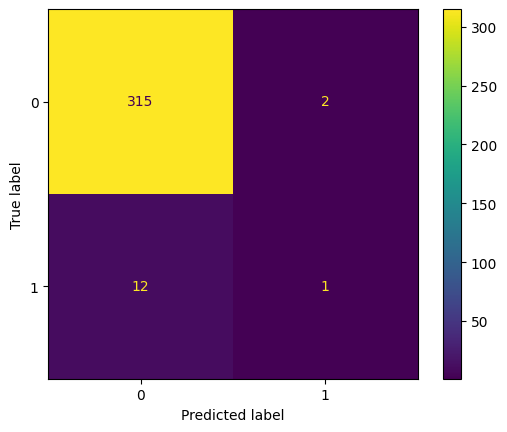

In [71]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot();

# Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

we can also "import warnings" to ignore warnings.
warnings.filterwarnings('ignore')

In [73]:
class MachineLearning:
    def __init__(self, list_of_split_data):
        self.list_of_split_data = list_of_split_data

    def Random_Forest(self):
        clf = RandomForestClassifier()
        clf.fit(self.list_of_split_data[0], self.list_of_split_data[2])
        y_pred = clf.predict(self.list_of_split_data[1])
        print(accuracy_score(self.list_of_split_data[3], y_pred) * 100)

        print(classification_report(y_test, y_pred))

        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(cm)
        disp.plot();

smote = SMOTE(k_neighbors=min(5, sum(y_train == 1) - 1), random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

list_of_split_data = [X_train_resampled, X_test, y_train_resampled, y_test]

dm = MachineLearning(list_of_split_data)


95.15151515151516
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       317
         1.0       0.20      0.08      0.11        13

    accuracy                           0.95       330
   macro avg       0.58      0.53      0.54       330
weighted avg       0.93      0.95      0.94       330



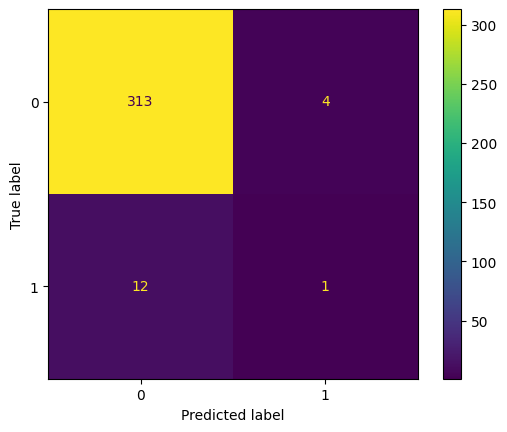

In [74]:
dm.Random_Forest()